---
title: '曾经的神：Support Vector Machine'
date: 2021-07-30
permalink: /posts/2021/07/svmyyds/
tags:
  - Machine Learning
---
# Intro
最近申请工作的时候被问到了，自己这个菜鸡🐔对国内工作不熟悉加上没有充分准备，感觉回答的不是很好😭，
今天，我们就来好好梳理一下什么是SVM，怎么用，原理和trick～

---

# Support Vector Machine (Classifier)
suggest readings:
- [x] Alpaydin: 10.3, 13.1, 13.2
- [x] Murphy: 14.5.2.2
- Geron: chapter 5, appendix C

## Alpaydin 阅读笔记

### [10.3] Geometry of the Linear Discriminant （线性可区分的图像）
- 从一个简单的 two classes 情况开始解析，在这种情况下，单个的区分方程已经足够：
- Discriminant between two classes:
$$
\begin{equation}\label{Discriminant_between_two_classes}
\begin{split}
g(\chi) &= g_1(\chi) - g_2(\chi)\\
        &= ((w_1)^T\chi + w_{10}) - ((w_2)^T\chi + w_{20})\\
        &= (w_1 - w_2)^T\chi + (w_{10} - w_{20})\\
        &= w^T\chi + w_0
\end{split}
\end{equation}
$$
- we choose
$$
\left\{
        \begin{matrix}
            C_1,\text{ }g(\chi) > 0\\
            C_2,\text{ }otherwise
        \end{matrix}
\right.
$$

`weight vector threshold`:
- defines a hyperplane where $w$ is the weight vector and $w_0$ is the threshold.

### Decision rule
- choose $C_1$ if $w^T\chi > -w_0$, and choose $C_2$ otherwise. The hyperplane divides the input space into two half-spaces: decision region $R_1$ for $C_1$ and $R_2$ for $C_2$. Any $\chi$ in $R_1$ is on the `positive` side of the hyperplane and any $\chi$ in $R_2$ is on the `negative` side.
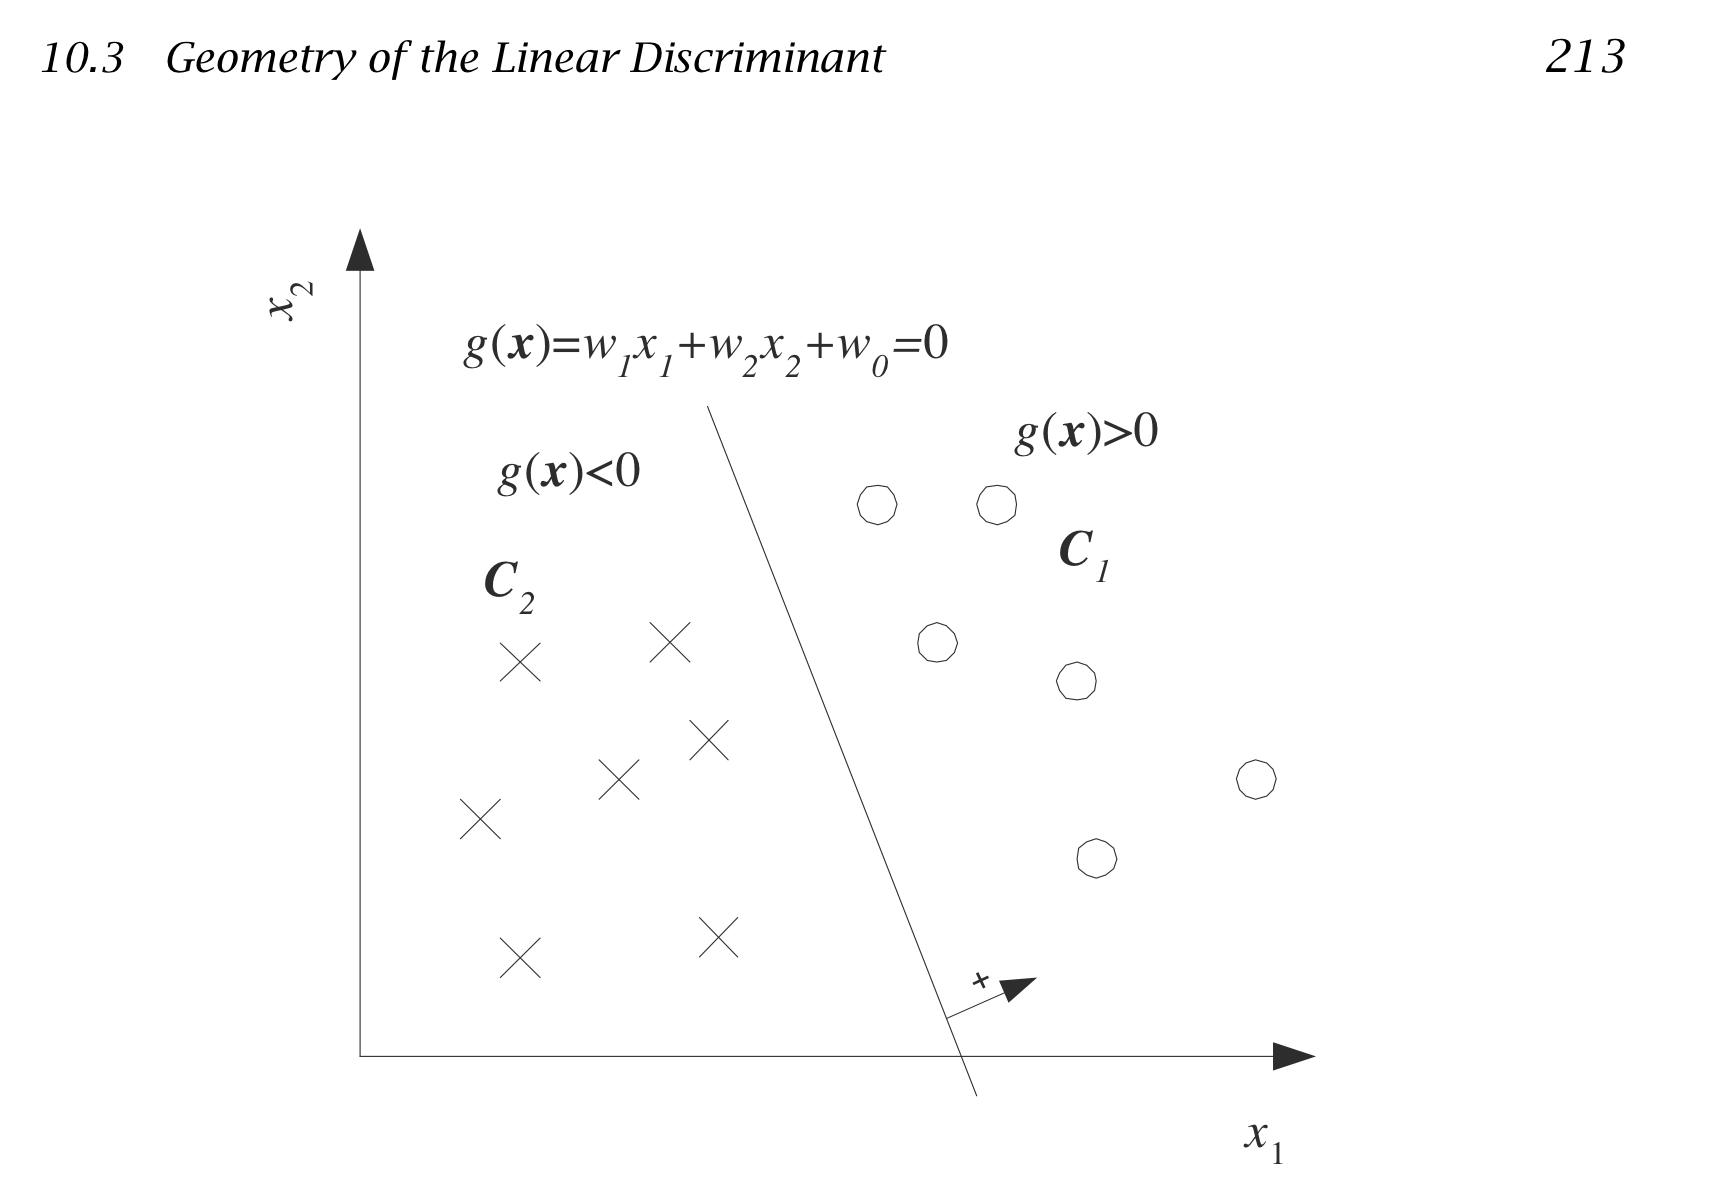

### Decision bounduary equation
- Let's take 2 points on the decision surface; that is, $g(\chi_1) = g(\chi_2) = 0$, then

$$
\begin{equation}
\begin{split}
    w^T\chi_1 + w_0 &= w^T\chi_2 + w_0\\
    w^T(\chi_1 - \chi_2) &= 0
\end{split}
\end{equation}
$$

and we see that $w$ is *normal* to any vector lying on the hyperplane. Let's rewrite $\chi$ as

$$
\begin{equation}
    \chi = \chi_p + r\frac{w}{||w||}
\end{equation}
$$

- $\chi_p$: normal projection of $\chi$ onto the hyperplane
- $r$: the distance from $\chi$ to the hyperplane
    - $<0$ if $\chi$ is on the negative side
    - $>0$ if $\chi$ is on the positive side
    
$$
\begin{equation}
    r = \frac{g(\chi)}{||w||}
\end{equation}
$$

So, at the origin the distance $r_0$ will be

$$
\begin{equation}
    r_0 = \frac{w_0}{||w||}
\end{equation}
$$

Thus $w_0$ determines the `location` of the hyperplane with respect to the origin, and $w$ determines its `orientation`.

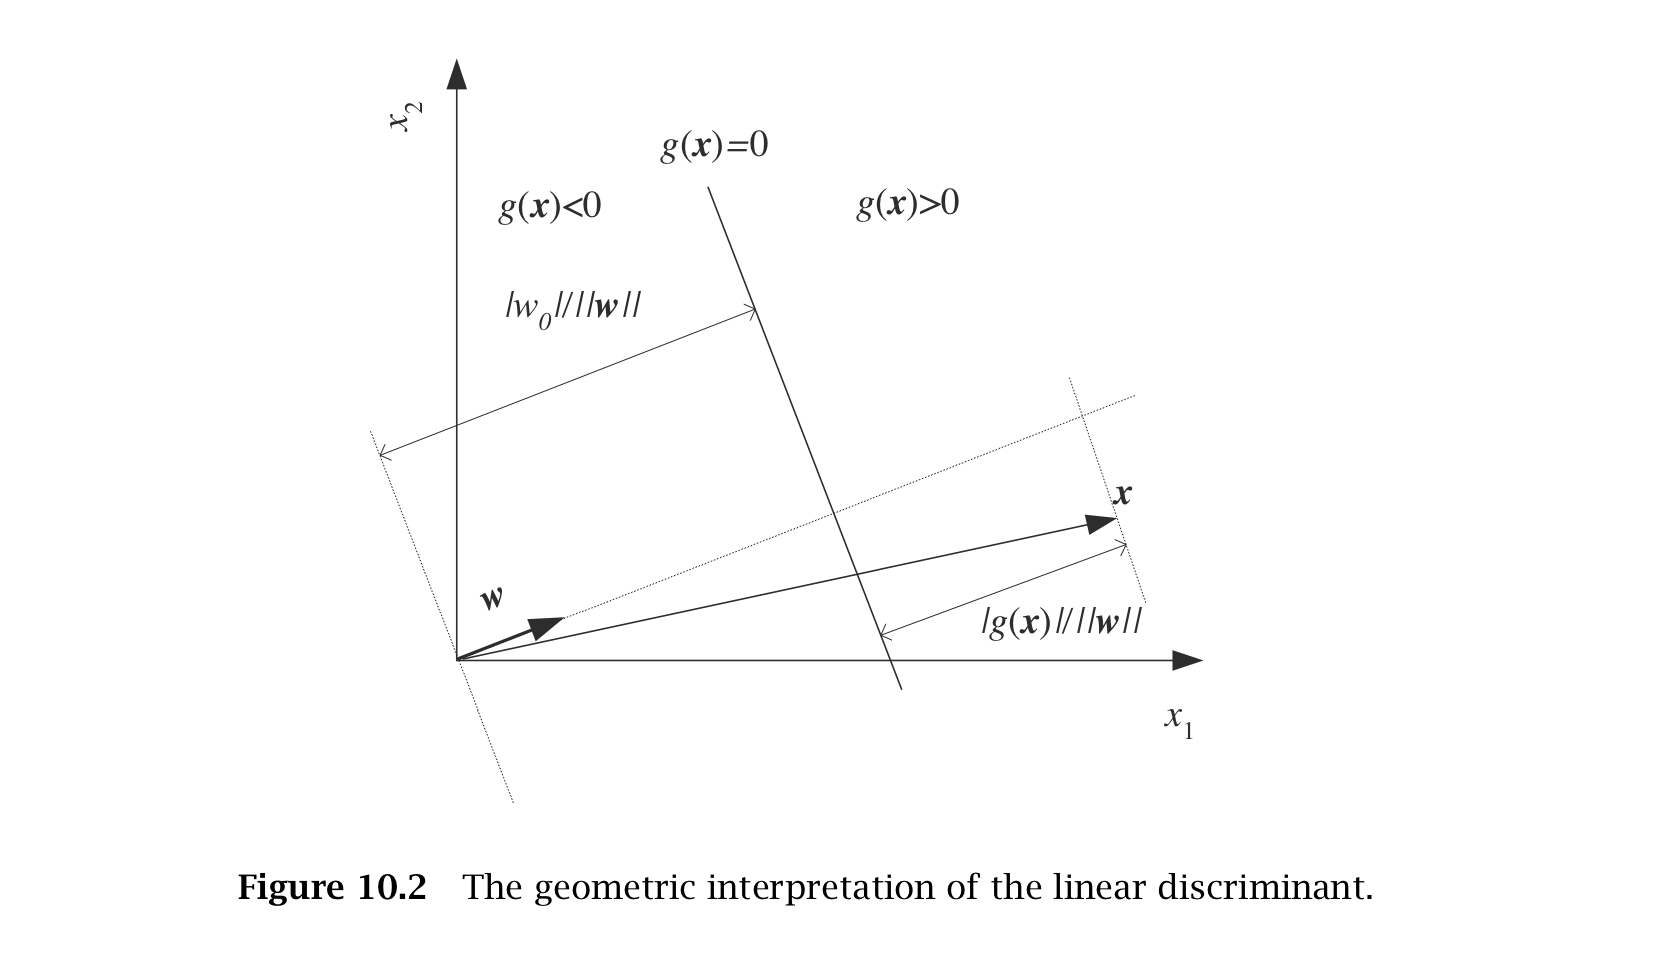

### Multiple Classes

When there are K>2 classes, there are K discriminant（可辨别的）funtions. When they are linear, we have

$$
\begin{equation}
g_i(\chi|w_i, w_{i0}) = w^{T}_i\chi + w_{i0}
\end{equation}
$$

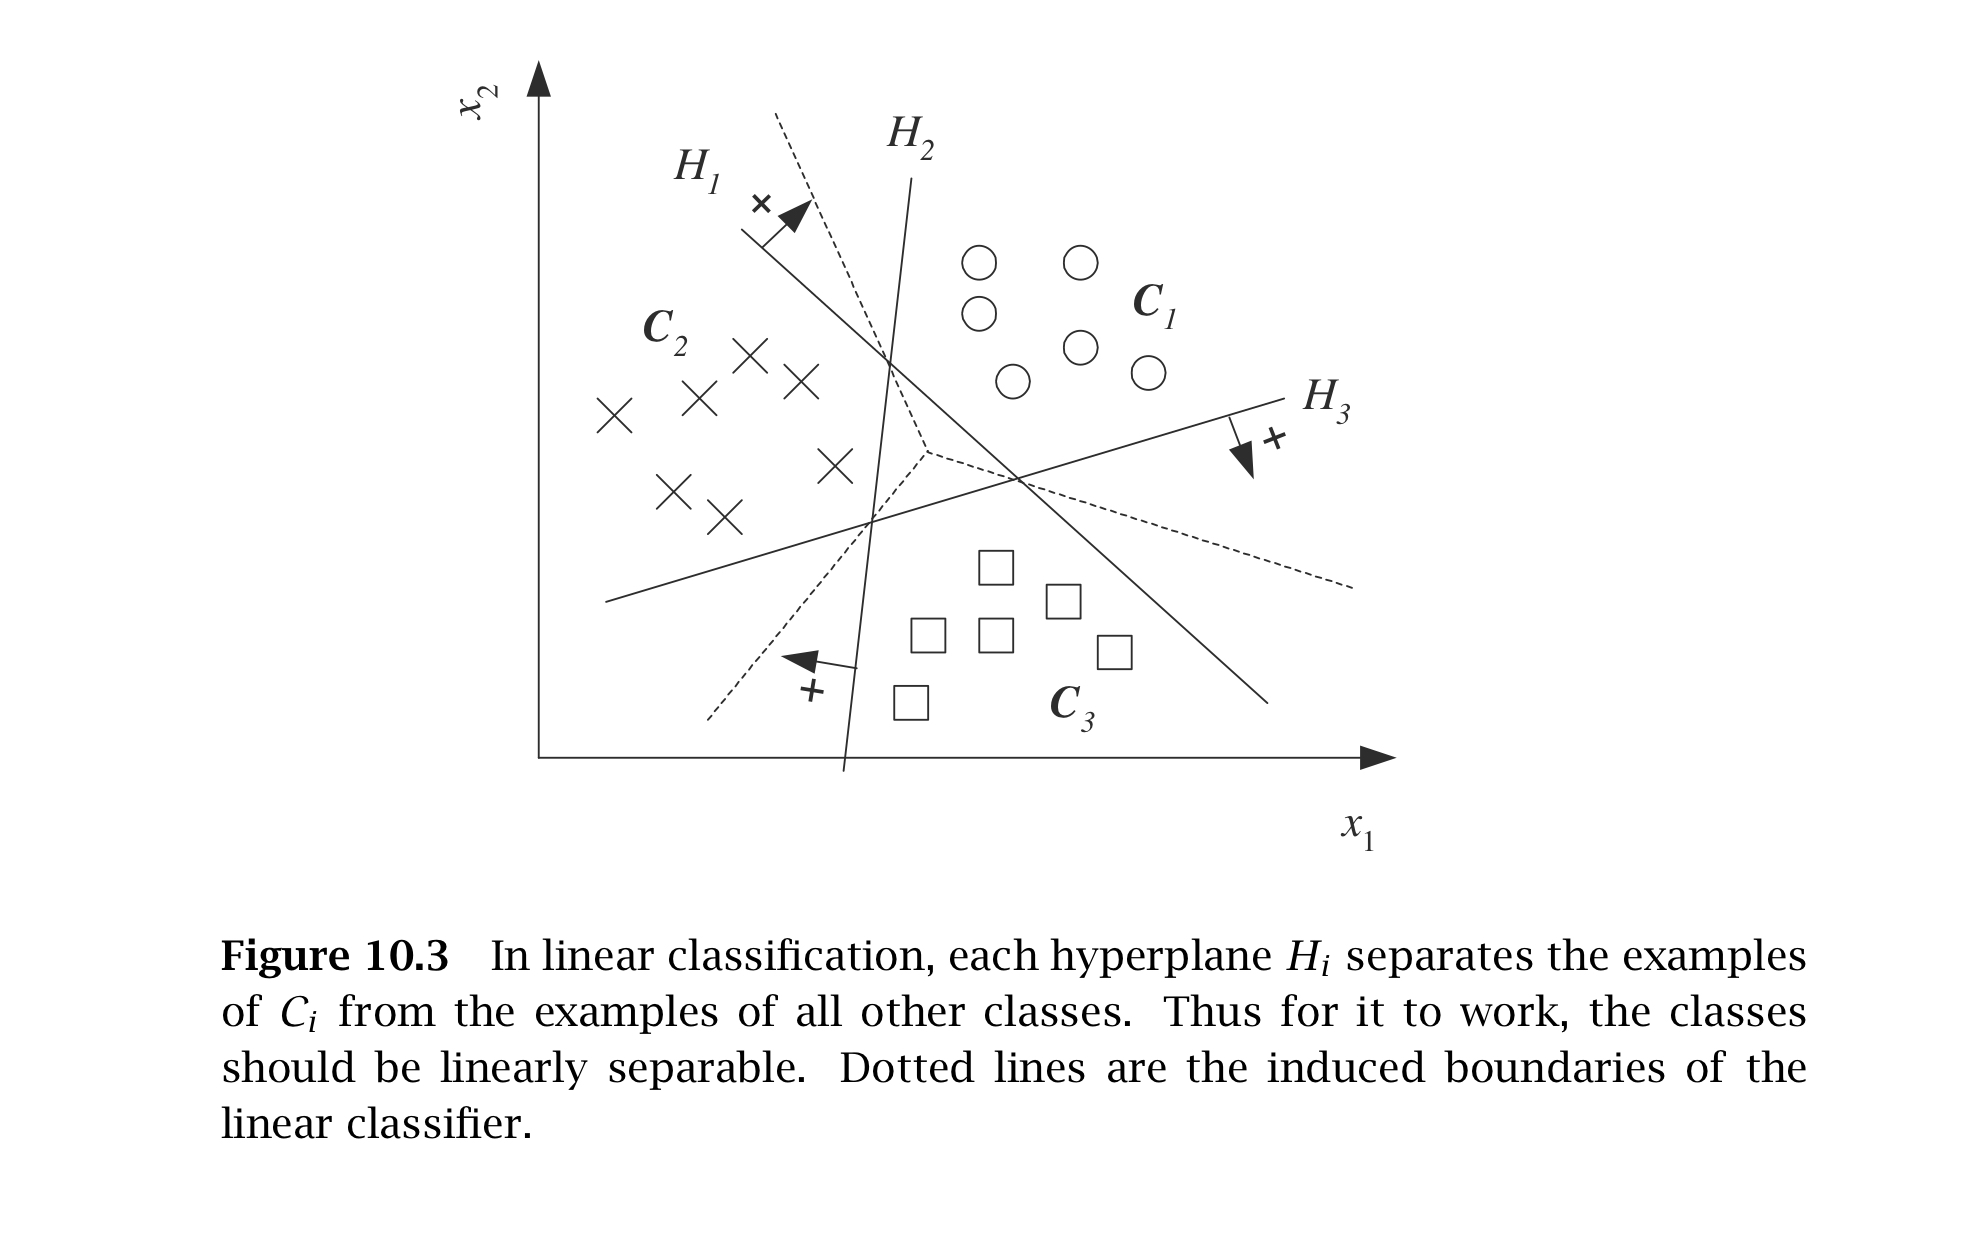

We assume that the parameters, $w_i$, $w_i0$, are computed so as to have
$$
g_i(\chi)=
\left\{
        \begin{matrix}
            C_1,\text{ }g(\chi) > 0\\
            C_2,\text{ }otherwise
        \end{matrix}
\right.
$$

for all $\chi$ in the training set. 

- Using such discriminant functions corresponds to *assuming* that ``all calsses are linearly separable``

- Sometimes not all the points can lies either in (+) or (-) class. The susal approach is to assign $\chi$ to the class having the highest discriminant:
    - choose $C_i$ if $g_i(\chi) = max^K_{j=1}g_j(\chi)$
        - <font color=red>linear classifier</font>: recall the $\frac{|g_i(\chi)|}{||w_i||}$ is the ``distance from the input point to the hyperplane``, assuming $w_i$ have similar length, this assigns the point to the class(among all $g_j(\chi) > 0$) to whose hyperplane the point is most distant.
        - linear classifier cont: it geometrically divides the feature space into K convex decision regions $R_i$ 

### [13.1] Kernel Machines
> *Kernel Machines* are `maximum margin methods` that allow the model to be written as a sum of the influences of a subset of the training instances. These influences are given by application-specific similarity kernels, and we discuss "kernelized" <font color=blue>classification</font>, <font color=orange>regression</font>, <font color=purple>outlier detection</font>, and <font color=red>dimensionality reduction</font>, as well as *how to choose and use kernels*.

---

- Each learning algorithm has a different `inductive bias`, makes different `assumptions`, and defines a different `objective function` and thus may find a different *linear model*.
- The model `support vector machine`(SVM) was generalized under the name `kernel machine`

  It is popular because:
- It never solve a more complex problem as a `first step` before the actual problem(Vapnik 1995)
- Goal: We only need to find the <font color=red>boundary</font> separating those $\chi$ that have low $p(\chi)$, that is, $\chi$ where $p(x) < \theta$, for some threshold <font color=blue>$\theta \in (0,1)$</font>

---

- <font color=green>After training</font>, the parameter of the linear model, the weight vector, can be written down in terms of a subset of the training set, which are the so-called `support vectors`. 
- In <font color=red>classification</font>, **support vectors** are the cases that are close to the boundary and as such, knowing them allows <font color=blue>knowledge extraction</font>: those are the `uncertain or erroneous cases` that lie in the vicinity（邻近的）of the boundary between 2 classes.
- Their number gives us an <font color=red>estimate of the generalization error</font>, and, being able to write the <font color=red>model parameter</font> in terms of a set of instances allows <font color=red>kernelization</font>.
- <font color=brown>Nonlinear basis functions</font> allowing us to map the input to <font color=brown>another space</font> where a <font color=brown>linear(smooth) solution is possible</font>; the kernel function usese the same idea.
- Typically in most learning algorithms, `data points` are represented as `vectors`, and either `dot product`(as in the multilayer perceptrons) or `Euclidean distance`(as in radial basis function networks) is used. <font color=blue>A kernel function allows us to go beyond that.</font> 
    * For example, $G_1$ and $G_2$ may be two graphs and $K(G_1,G_2)$ may correspond to the number of shared paths, which we can calculate <font color=green>without</font> needing to represent $G_1$ or $G_2$ explicitly as vectors.
- <font color= red>Kernel-based</font> algorithms are formulated as <font color=blue>convex optimization problems</font>. Since there is a single optimum that we can solve for analytically, we are no longer bothered with heuristics（探索的）for `learning rates`, `initializations`, checking for `convergence`, and such

### [13.2] Optimal Separating Hyperplane

Let's start with 2 classes and use label $-1 / +1$ for the two classes. $X = \{\chi^t , r^t\}$ , where $r^t = +1$ if $\chi^t \in C_1$ and $r^t = -1$ if $\chi^t \in C_2$. We would like to find $w$ and $w_0$ such that

$$
\left\{
    \begin{matrix}
         w^T \chi^t + w_0 \ge +1,\text{ } r^t = +1\\
         w^T \chi^t + w_0 \le -1,\text{ } r^t = -1
     \end{matrix}
\right.
$$

Re-written as

$$
r^t(w^T\chi^t + w_0) \ge +1
$$

rather than $\ge$ 0

The **optimal separating hyperplae** is the one that **maximizes the margin**.

The distance of $\chi^t$ to hte discriminant is

$$
\frac{|w^t\chi^t + w_0|}{||w||}
$$

when $r^t \in \{-1,+1\}$, can be written as

$$
\frac{r^t(w^T\chi^t + w_0)}{||w||}
$$

and we would like this to be at least some value $\rho$, $\forall t$

we want to maximize $\rho$ but there are infinite solutions, we fix $\rho||w||=1$ and thus, to maximize the margin, we minimize $||w||$.

The task become:

$min\frac{1}{2}||w||^2$ subject to $r^t(w^T\chi^t + w_0)\ge +1, \forall t$

#### dual form
In finding the optimal hyperplane, we can convert the optimaization problem to a form whose complexity depends on $N$：the number of tarining instances, not on $d$. 

To get he new formulation, we first write equation 13.3 as an unconstrained problem using Lagrange multipliers $\alpha^t$:

$$
\begin{split} % need split to align
L_p &= \frac{1}{2}||w||^2 - \sum_{t=1}^N\alpha^t[r^t(w^T\chi^t + w_0) - 1]\\
&= \frac{1}{2}||w||^2 - \sum_{t}\alpha^tr^t(w^T\chi^t + w_0) + \sum_{t}\alpha^t
\end{split}
$$

This is a **convex quadratic optimization** problem because the main term is convex and the linear constraints are also convex.

Therefore, we can equivalently solve the dual problem.

The dual is to *maximize $L_p$* with respect to $\alpha^t$, subject to the constraints that the gradient of $L_p$ with respect to $w$ and $w_0$ are 0 and also that $\alpha^t\ge0$:

$$
\frac{\partial L_p}{\partial w} = 0 \Rightarrow w = \sum_{t}\alpha^tr^t\chi^t
$$

$$
\frac{\partial L_p}{\partial w} = 0 \Rightarrow \sum_{t}\alpha^tr^t = 0
$$

plug in the equations above into the equation further above, we get the **dual** form

$$
\begin{split}
L_d &= \frac{1}{2}(w^Tw) - w^T\sum_t\alpha^tr^t\chi^t - w_0\sum_t\alpha^tr^t + \sum_t\alpha^t\\
&= -\frac{1}{2}(w^Tw) + \sum_t\alpha^t\\
&= -\frac{1}{2}\sum_t\sum_s\alpha^t\alpha^sr^tr^s(\chi^t)^T\chi^s + \sum_t\alpha^t
\end{split}
$$

The size of dual depends on N(sample size), not on d(the input dimensionality).

## Murphy 阅读笔记

### [14.5.2.2] The large margin principle

> In this section, we derive equation below form a completely different perspective. Recall our **goal** is to derive a `discriminant function` $f(x)$ which will be **linear** in the feature space implied by the choice of **kernel**. Consider a point $x$ in this induced space. 

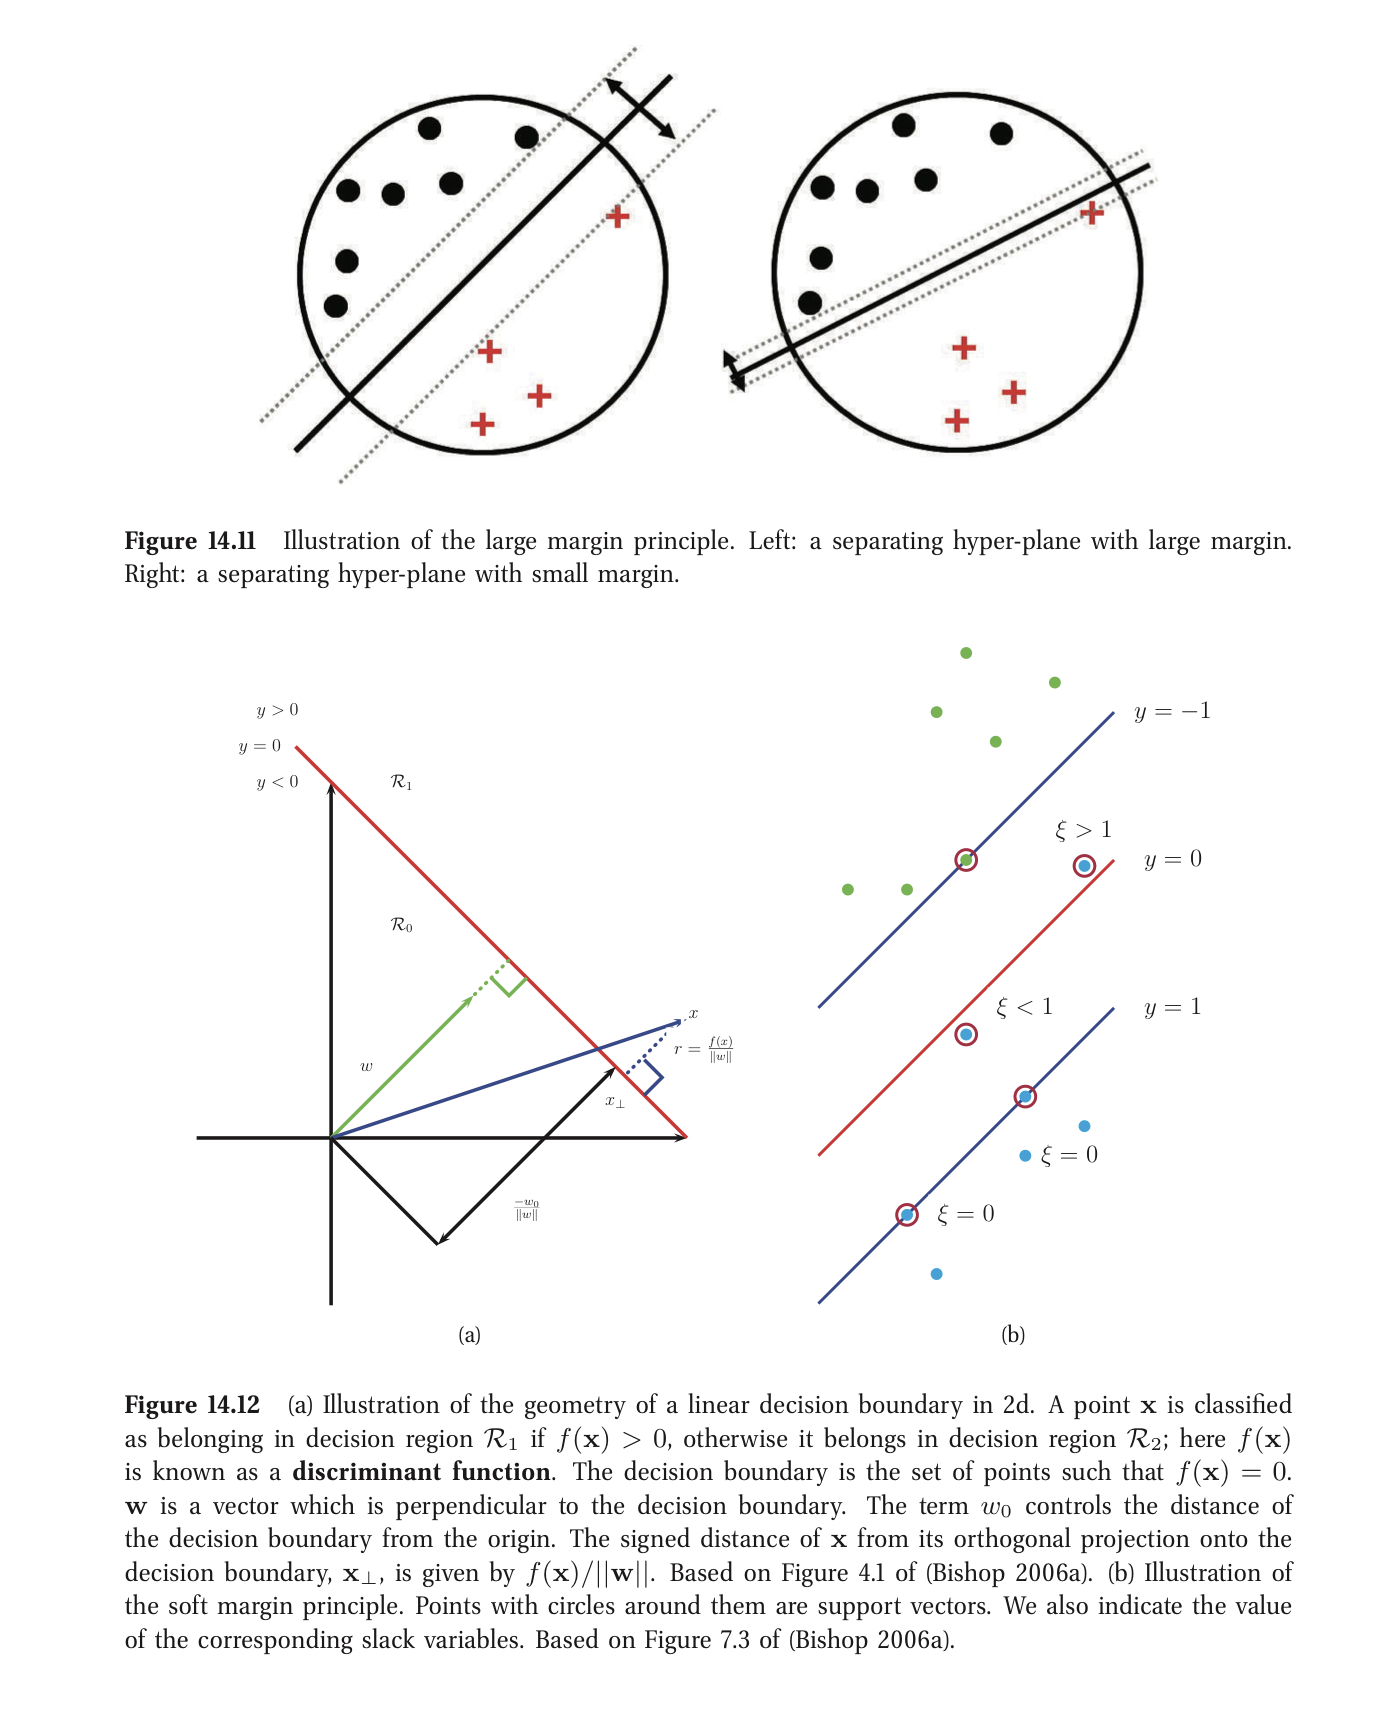

Referring to Figure 14.12(a), we see that

$$
x = x_{\bot} + r\frac{w}{||w||}
$$

where $r$ is the distance of $x$ from the decision boundary whose normal vector is $w$, and $x_{\bot}$ is the orthogonal projection of x onto this boundary. Hence

$$
\begin{align}
f(x) &= w^Tx + w_0\\
&= (w^Tx_{\bot} + w_0) + r\frac{w^Tw}{||w||}
\end{align}
$$

Now $f(x_{\bot}) = 0$ so $0 = w^Tx_{\bot} + w_0$. 

Hence $f(x) = r\frac{w^Tw}{\sqrt{w^Tw}}$

and $r = \frac{f(x)}{||w||}$

- We would like to make this distance $r = \frac{f(x)}{||w||}$ as large as possible, for reasons illustrated in Figure 14.11.
- there might be many lines that perfectly separate the tarining data(especially if we work in high dimensional feature space), but intuitively, the best one to pick is the one that maximizes the margin, i.e., the perpendicular distance to the closest point. In addition, we went to ensure each point is on the correct side of hte boundary, hence we want $f(x_i)y_i > 0$. So our objective becomes
$$
\underset{w,w_0}{\max}\min_{i=1}^{N}\frac{y_i(w^Tx_i + w_0)}{||w||}
$$

Note that by **rescalling the parameters** using $w \rightarrow kw$ and $w_0 \rightarrow kw_0$, we do not change the `distance of any point to the boundary`, since the $k$ factor cancels out when we divide by $||w||$. Therefore let us define hte scale factor such that $y_if_i = 1$ for the point that is closest to the decision boundary. We therefore want to optimize

$$
\underset{w,w_0}{\min}\frac{1}{2}||w||^2
$$

s.t.

$$
y_i(w^Tx_i + w_0)\ge1, i=1:N
$$

- The fact of $\frac{1}{2}$ is added for convenience and **doesn't** affect the optimal parameters

If the data is <font color=red>not</font> **linearly separable**(even after using the kernel trick), there will be no feasible solution in which $y_if_i\ge1$ for all $i$. We therefore introduce slack variables $\xi_i \ge 0$ such that $\xi_i=0$ if the point lies inside the correct margin boundary, and $\xi_i = |y_i - f_i|$ otherwise.

- If $0<\xi_i\le1$ the point lies *inside* the margin, but on the correct side of the dicision boundary
- If $\xi_i > 1$, the point lies on the wrong side of the decision boundary.[See figure 14.12b]

We replace the hard constraints that $y_if_i\ge0$ with the **soft margin constaints** that $y_if_i\ge1-\xi_i$. The new objective becomes

$$
\underset{w,w_0,\xi}{\min}\frac{1}{2}||w||^2 + C\sum_{i=1}^N\xi_i
\\s.t.\\ \xi_i \ge 0,\\ y_i(x_i^Tw + w_0) \ge 1-\xi_i
$$

Since $\xi_i > 1$ means point $i$ is misclassified, we can interpret $\sum_i{\xi_i}$ as an upper bound on the number of misclassified points.

The parameter $C$ is a regularization parameter that controls the **number of errors we are willing to tolerate** on the training set. It is common to define this using $C = \frac{1}{vN}$, where $0<v\le1$ controls the fraction of misclassified points that we allow during the training phase. This is called a $v$-**SVM classifier**. This is usually set using cross-validation.

## Geron ch5 阅读笔记

Here's a great overall intro to SVM:

> A **Support Vector Machine (SVM)** is a very powerful and versatile Machine Learning model, capable of performing <font color=red>linear or nonlinear</font> classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but <font color=blue>small- or medium-sized</font> datasets

You can think of an SVM classifier as fitting the **widest** possible street between the classes. This is called *large margin classification*.

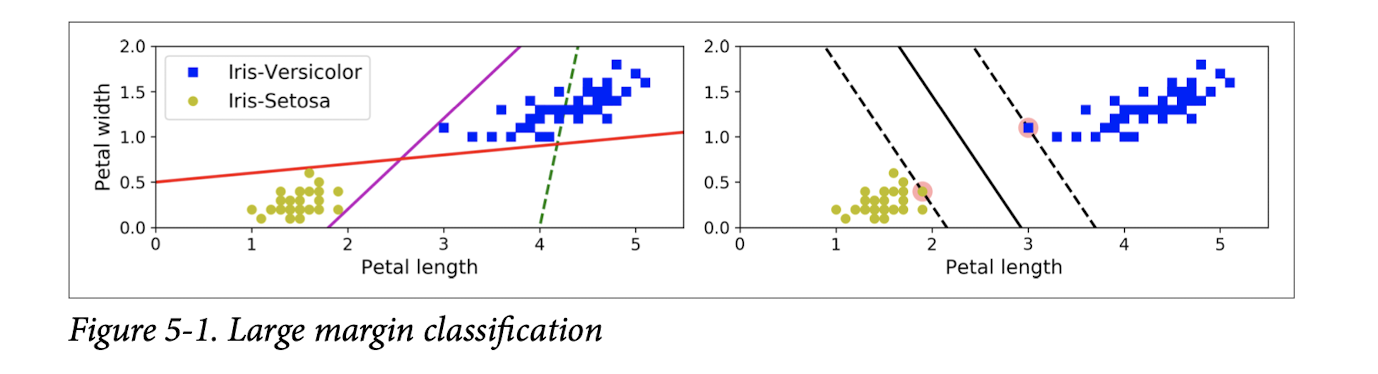

Notice that adding more training instances "off the street" will **not** affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the support vectors (circled in Figure 5-1).

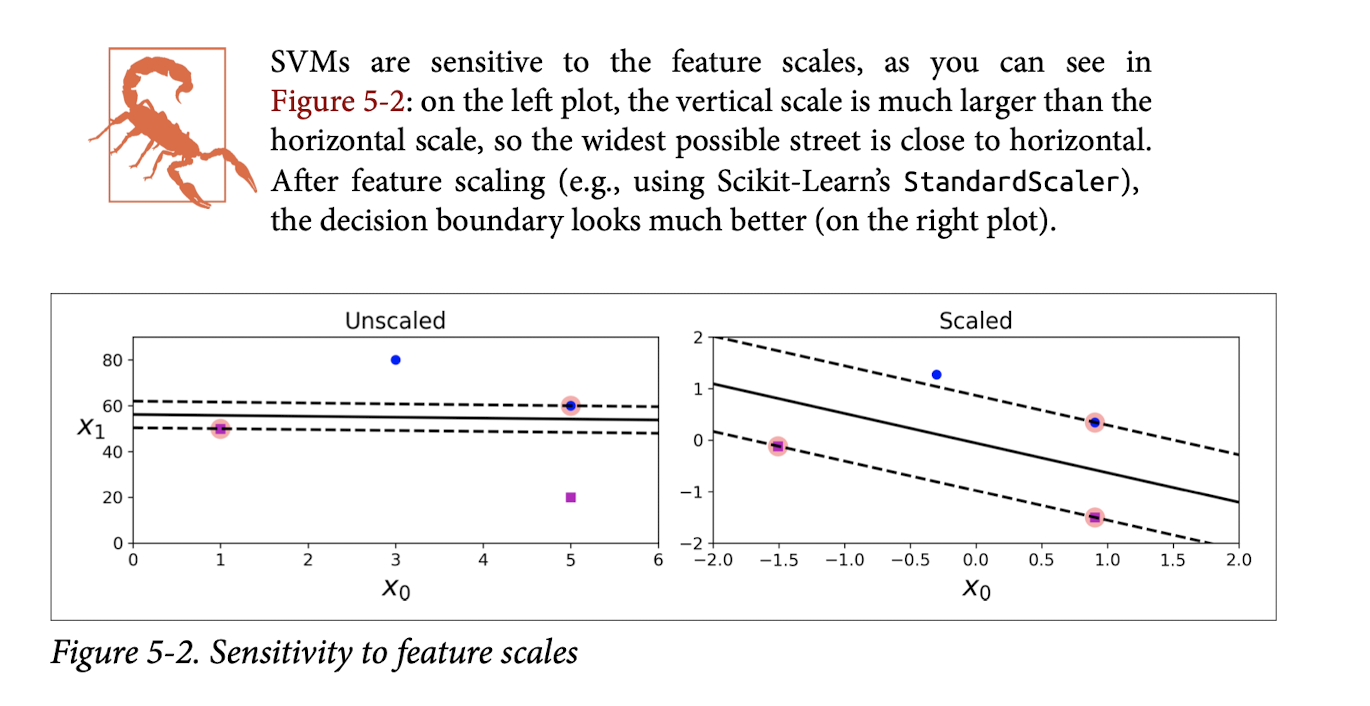

### Soft Margin Clasification

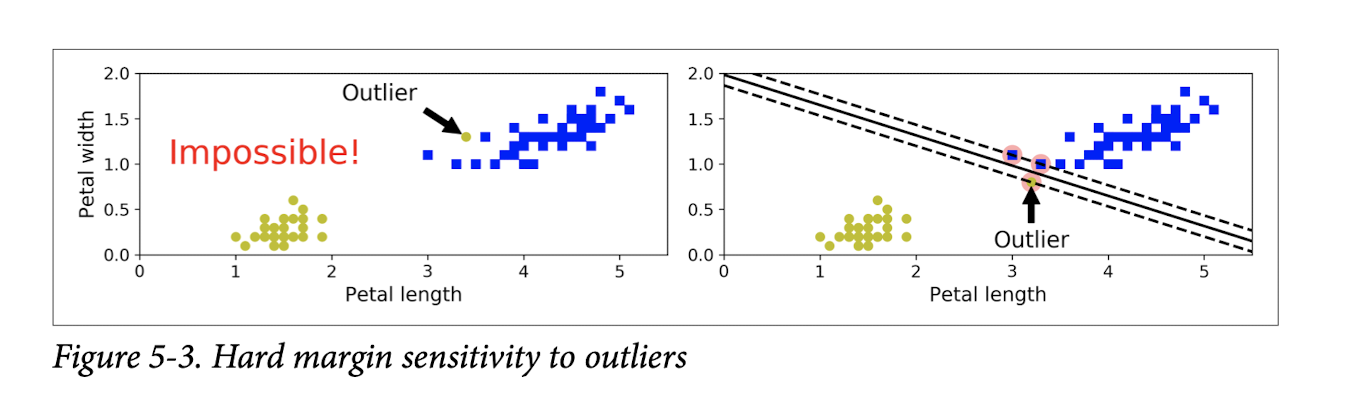

Hard margin classification: strictly impose all the instances be off the street and on the right side.

2 main issues with hard margin classification:
- only works if data is `linearly separable`
- quite sensitive to outliers

Figure 5-3 shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin, and on the right the decision boundary ends up very different from the one we saw in Figure 5-1 without the outlier, and it will probably not generalize as well.

To avoid these issues, the objective is to **find a good balance between keeping the street as large as possible and limiting the margin violations** (i.e.,  instances that end up in the middle of the street or even on the wrong side). This is called `soft margin classification.`

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris() 
X = iris["data"][:, (2, 3)] 
# petal length, petal width 
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
svm_clf = Pipeline([
    ("scaler", StandardScaler()),  
    ("linear_svc", LinearSVC(C=1, loss="hinge")), 
])
svm_clf.fit(X, y) 
"""
The LinearSVC class regularizes the bias term, 
so you should center the training set first by subtracting its mean.
This is automatic if you scale the data using the StandardScaler. 
Moreover, make sure you set the loss hyperparameter to "hinge", 
as it is not the default value. 
Finally, for better performance you should set the 
dual hyperparameter to False, unless there are 
more features than training instances 
(we will discuss duality later in the chapter).
"""

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])
# unlike logistic regression classifiers, SVM classifiers DO NOT output probabilities for each class

array([1.])

In [8]:
from sklearn.svm import SVC
# alternatively, we could use SVC class, using SVC(kernel='linear', C=1),
# but it is much slower,especially with large training sets,it's not recommended
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc_class", SVC(kernel='linear', C=1)), 
])
svm_clf_2.fit(X, y) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_class', SVC(C=1, kernel='linear'))])

In [13]:
svm_clf_2.predict([[5.5, 1.7]])

array([1.])

In [12]:
# another option is to use the SGDClassifier class, 
# with SGDClassifier(loss='hinge', alpha=1/(m*C))
# This applies regular Stochastic Gradient Descent to train a 
# SVM classifier. It does not converge as fast as the LinearSVC
# class, but it can be useful to handle huge datasets that 
# do not fit in memory (out-of-core training),
# or to handle online classification tasks.
from sklearn.linear_model import SGDClassifier
m = 0.5
C = 0.5
svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("SGD", SGDClassifier(loss="hinge",alpha=1/(m*C)))
])
svm_clf_3.fit(X, y) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('SGD', SGDClassifier(alpha=4.0))])

In [14]:
svm_clf_3.predict([[5.5, 1.7]])

array([0.])